<a href="https://colab.research.google.com/github/frm1789/100DaysOfPython/blob/main/PCA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA Application


* Grasp the fundamental linear algebra techniques which are used to compute PCA.
* Utilize NumPy to transition your newly gained mathematical knowledge into code.
* Apply scikit-learn’s PCA and learn about its nuances while using it.
* Understand the benefits of dimensionality reduction and the trade-off between speed and accuracy.


# Project outline

This project is divided into 3 milestones.

1. Computing eigenvalues and eigenvectors
Estimated duration: 1-2 hours

2. Implementation of PCA and Logistic Regression
Estimated duration: 1.5 -2 hours

3. Plot, analyze, and compare results
Estimated duration: 3.5-4 hours

# About this Notebook

This `Jupyter Notebook` is the starter notebook for the second milestone of the project <b>Principal Component Analysis</b>. It consists of the following tasks:

- Implementation of the covariance matrix and eigendecomposition in the custom PCA class.
- Prepare data for training: train/test-split and normalization of the dataset.
- Implement logistic regression with [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression) and validate its accuracy.

In [3]:
# standard imports
import numpy as np


# sklearn
import sklearn
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# other useful imports
from importlib import reload
from time import time


# imports for plotting
import matplotlib.pyplot as plt


#ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# change data_home path where you wnat to store the data
# important: as_frame needs to be set as False otherwise we would get a data frame
# and would have to convert the dataset to numpy arrays later on
mnist = fetch_openml('mnist_784', data_home='data/', as_frame=False)

In [5]:
# the dataset is split into the images and the labels
# we expect values between 0 and 255 for images
print('Images shape: ', mnist.data.shape)
print('Images range: ', mnist.data.min(), ' - ', mnist.data.max(), 'pixel')
print('Labels shape: ', mnist.target.shape)

Images shape:  (70000, 784)
Images range:  0.0  -  255.0 pixel
Labels shape:  (70000,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [9]:

# check the split
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 784)
y_train: (60000,)
x_test:  (10000, 784)
y_test:  (10000,)


 from
 https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib

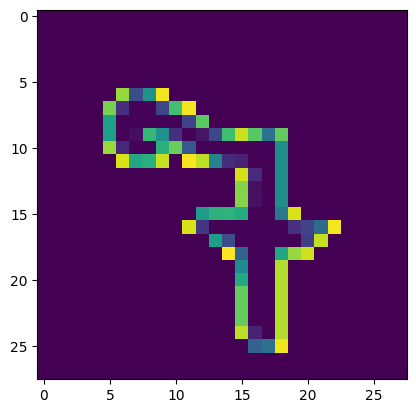

In [18]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

# Get a batch of two random images and show in a pop-up window.
gen_image(x_train[0]).show()


In [19]:
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  40. 195. 126.   6.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

#### Normalize the data 
By dividing by 255

In [21]:
x_train  = np.array(x_train)/255
x_test = np.array(x_test)/255